# **Data Mentorship Program 

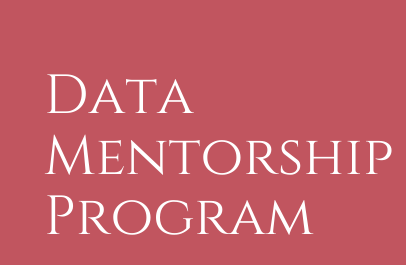


Advanced Statistics in Python (Hypothesis testing, introduction to p-value, probability, and sampling distributions)


Data Mentorship Proogram presents this class as a form of an educational event. All the information and code on this file is the property of Data Mentorship Program. If you have any questions, please email us at rajvi@datamentorship.org

In this Google Collab, we will be using a public dataset to learn about basic statisical coding using Jupyter Notebooks. Please follow along each step. 
## Import Notebooks and Packages 

In [ ]:
## Download library to import from Google sheets
# Conduct descriptive analysis in Python (mean, median, mode, Standard deviation)
#Goal : This document shares a step by step guide on conducting descriptive statistics using Jupyter

##Step 1 - Download google sheet data
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

workbook = gc.open_by_url('https://docs.google.com/spreadsheets/d/12SPs65HdUE2E5I3D38wmDvWsTPpMXeN2JURg0cxBr3U/edit#gid=0')
ws = workbook.worksheet('Sheet1')

# get_all_values gives a list of rows.
rows = ws.get_all_values()


# Convert to a DataFrame and render.
import pandas as pd
df = pd.DataFrame.from_records(rows)
#set column names equal to values in row index position 0
df.columns = df.iloc[0]
#remove first row from DataFrame
df = df[1:]
print(df.head(10))

0  R&D Spend Administration Marketing Spend       State    Profit
1   165349.2       136897.8        471784.1    New York  192261.8
2   162597.7       151377.6        443898.5  California  191792.1
3   153441.5       101145.6        407934.5     Florida  191050.4
4   144372.4       118671.9        383199.6    New York    182902
5   142107.3       91391.77        366168.4     Florida  166187.9
6   131876.9       99814.71        362861.4    New York  156991.1
7   134615.5       147198.9        127716.8  California  156122.5
8   130298.1       145530.1        323876.7     Florida  155752.6
9   120542.5         148719        311613.3    New York  152211.8
10  123334.9       108679.2        304981.6  California    149760


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

In [ ]:
#Get columns
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object', name=0)

In [ ]:
##Convert the columns to specific data types


df['R&D Spend'] = df['R&D Spend'].astype(float)
df['Administration'] = df['Administration'].astype(float)
df['Marketing Spend'] = df['Marketing Spend'].astype(float)
df['Profit'] = df['Profit'].astype(float)

In [ ]:
#Look at top 5 enteries 
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
1,165349.2,136897.80,471784.1,New York,192261.8
2,162597.7,151377.60,443898.5,California,191792.1
3,153441.5,101145.60,407934.5,Florida,191050.4
4,144372.4,118671.90,383199.6,New York,182902.0
5,142107.3,91391.77,366168.4,Florida,166187.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 1 to 47
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        47 non-null     float64
 1   Administration   47 non-null     float64
 2   Marketing Spend  47 non-null     float64
 3   State            47 non-null     object 
 4   Profit           47 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,47.000000,47.000000,4.700000e+01,47.000000
mean,78415.716809,122618.692128,3.207293e+05,117185.477447
std,43234.246856,26916.492131,6.425318e+05,35576.750441
min,1000.230000,51283.140000,1.903930e+03,49490.750000
25%,46220.045000,104404.250000,1.442880e+05,96596.155000
50%,75328.870000,122782.800000,2.497446e+05,108734.000000
75%,108218.350000,145303.850000,3.040440e+05,142922.450000
max,165349.200000,182645.600000,4.568194e+06,192261.800000


In [ ]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
0,,,,
R&D Spend,1.000000,0.197825,0.148520,0.977709
Administration,0.197825,1.000000,0.154043,0.137056
Marketing Spend,0.148520,0.154043,1.000000,0.148543
Profit,0.977709,0.137056,0.148543,1.000000


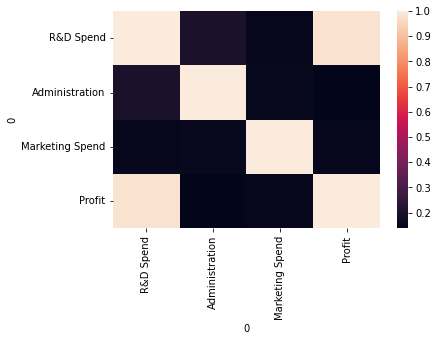

In [ ]:
sns.heatmap(df.corr());

Step 3: Check Normality 
What is Normality in statistics? The normal distribution describes the shape of the data (normally distributed data has a bell curve shape). Here, we are using a hypothesis test for checking the normality of the data. 
Null Hypothesis: The data is not normally distributed. 
Alternative Hypothesis: The data is normally distributed,


In [ ]:
df2 = df[["R&D Spend","Administration","Marketing Spend","Profit"]]

In [ ]:
df2.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object', name=0)

Check Normality

In [ ]:
def check_normality(df2):
  test_stat_normality, p_value_normality = stats.shapiro(df2)
  print(p_value_normality)

In [ ]:
group1 = df2[["R&D Spend"]]
group2 = df2[["Profit"]]
group3 = df2[["Marketing Spend"]]

In [ ]:
check_normality(group1)
check_normality(group2)

0.37213364243507385
0.20281466841697693


Fail to reject Null hypotheisis >> the data is normally distributed

Conduct T Test 
There are two types of tests that you can take at this point. T Test Z Test




In [ ]:
ttest, p_value = stats.ttest_ind(group1, group2)
print(p_value)

[7.54714522e-06]


PValue is less than 0.05, hence we reject the null hypothesis - R&D spend drops profit

Expand the hypothesis to all three states

Testing the hypothesis between the three states

In [ ]:
df_ny = df[df['State'] == 'New York']
df_cl = df[df['State'] == 'California']
df_fl = df[df['State'] == 'Florida']

In [ ]:
##Testing for New York

In [ ]:
dfny = df_ny[["R&D Spend","Administration","Marketing Spend","Profit"]]


In [ ]:
groupny1 = dfny[["R&D Spend"]]
groupny2 = dfny[["Profit"]]

In [ ]:
ttest, p_value = stats.ttest_ind(groupny1, groupny2)

In [ ]:
print(p_value)

[0.01711375]


In [ ]:
dfcl = df_cl[["R&D Spend","Administration","Marketing Spend","Profit"]]
groupcl1 = dfcl[["R&D Spend"]]
groupcl2 = dfcl[["Profit"]]

In [ ]:
ttest, p_value = stats.ttest_ind(groupcl1, groupcl2)
print(p_value)

[0.00878659]


In [ ]:
dffl = df_fl[["R&D Spend","Administration","Marketing Spend","Profit"]]
groupfl1 = dffl[["R&D Spend"]]
groupfl2 = dffl[["Profit"]]
ttest, p_value = stats.ttest_ind(groupfl1, groupfl2)
print(p_value)

[0.01008884]


For all three states, the null hypothesis is false, which means that increase in R&D spend increases profit